In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
#path to csv files
sf_2017 = "2017_StopFrisk.csv"

In [23]:
df_2017 = pd.read_csv(sf_2017, low_memory=False)

In [24]:
df_2017.head()

,STOP_FRISK_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,SPRINT_NUMBER,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
1,2,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
2,3,2/8/2017,11:10:00,2017,February,Wednesday,Based on C/W on Scene,17020808555,APP,POM,...,C,(null),WALL STREET && BROADWAY,(null),WALL STREET,981005,197131,(null),PBMS,MANHATTAN
3,4,2/20/2017,11:35:00,2017,February,Monday,Based on Self Initiated,9027,APP,POM,...,H,(null),75 GREENE STREET,(null),GREENE STREET,984031,202796,(null),PBMS,MANHATTAN
4,5,2/21/2017,13:20:00,2017,February,Tuesday,Based on Radio Run,10439,APP,POM,...,H,2,429 WEST BROADWAY,(null),WEST BROADWAY,983894,203523,(null),PBMS,MANHATTAN


In [25]:
df_2017.columns

Index(['STOP_FRISK_ID', 'STOP_FRISK_DATE', 'STOP_FRISK_TIME', 'YEAR2',
       'MONTH2', 'DAY2', 'STOP_WAS_INITIATED', 'SPRINT_NUMBER',
       'RECORD_STATUS_CODE', 'ISSUING_OFFICER_RANK',
       'ISSUING_OFFICER_COMMAND_CODE', 'SUPERVISING_OFFICER_RANK',
       'SUPERVISING_OFFICER_COMMAND_CODE',
       'SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED',
       'LOCATION_IN_OUT_CODE', 'JURISDICTION_CODE', 'JURISDICTION_DESCRIPTION',
       'OBSERVED_DURATION_MINUTES', 'SUSPECTED_CRIME_DESCRIPTION',
       'STOP_DURATION_MINUTES', 'OFFICER_EXPLAINED_STOP_FLAG',
       'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION', 'OTHER_PERSON_STOPPED_FLAG',
       'SUSPECT_ARRESTED_FLAG', 'SUSPECT_ARREST_NUMBER',
       'SUSPECT_ARREST_OFFENSE', 'SUMMONS_ISSUED_FLAG', 'SUMMONS_NUMBER',
       'SUMMONS_OFFENSE_DESCRIPTION', 'OFFICER_IN_UNIFORM_FLAG',
       'ID_CARD_IDENTIFIES_OFFICER_FLAG', 'SHIELD_IDENTIFIES_OFFICER_FLAG',
       'VERBAL_IDENTIFIES_OFFICER_FLAG', 'FRISKED_FLAG', 'SEARCHED_FLAG

In [26]:
df_reduced = df_2017[['STOP_FRISK_ID', 'STOP_FRISK_TIME', 'MONTH2', 'DAY2', 'SUSPECTED_CRIME_DESCRIPTION', 'STOP_DURATION_MINUTES', 'SUSPECT_ARRESTED_FLAG', 'FRISKED_FLAG', 'PHYSICAL_FORCE_WEAPON_IMPACT_FLAG', 'SUSPECT_REPORTED_AGE', 'SUSPECT_SEX', 'SUSPECT_RACE_DESCRIPTION', 'STOP_LOCATION_BORO_NAME']]

df_reduced["STOP_LOCATION_BORO_NAME"].replace("", "null", inplace=True)

name_of_df.dropna(inplace=True)
#this will drop all NaN values

In [27]:
df_reduced.head()

,STOP_FRISK_ID,STOP_FRISK_TIME,MONTH2,DAY2,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,SUSPECT_ARRESTED_FLAG,FRISKED_FLAG,PHYSICAL_FORCE_WEAPON_IMPACT_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,STOP_LOCATION_BORO_NAME
0,1,14:26:00,January,Monday,TERRORISM,90,N,N,(null),39,MALE,(null),MANHATTAN
1,2,14:26:00,January,Monday,TERRORISM,90,N,N,(null),37,MALE,(null),MANHATTAN
2,3,11:10:00,February,Wednesday,OTHER,40,N,N,(null),(null),FEMALE,WHITE,MANHATTAN
3,4,11:35:00,February,Monday,GRAND LARCENY AUTO,40,N,Y,(null),31,MALE,BLACK HISPANIC,MANHATTAN
4,5,13:20:00,February,Tuesday,BURGLARY,60,N,N,(null),(null),FEMALE,BLACK,MANHATTAN


In [28]:
df_reduced = df_reduced.set_index("STOP_FRISK_ID")

In [29]:
df_reduced.to_csv("df_reduced.csv")

In [30]:
manhattan_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "MANHATTAN", :]
brooklyn_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "BROOKLYN", :]
bronx_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "BRONX", :]
queens_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "QUEENS", :]
staten_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "STATEN IS", :]


In [31]:
# In which borough is the stop question and frisk technique most used? Least used?
manhattan_stops = len(manhattan_df)
brooklyn_stops = len(brooklyn_df)
bronx_stops = len(bronx_df)
queens_stops = len(queens_df)
staten_stops = len(staten_df)
nyc_total_stops = staten_stops + queens_stops + brooklyn_stops + manhattan_stops + bronx_stops

stops_df = pd.DataFrame({
    "Geographic_Area": ["Manhattan", "Brooklyn", "Bronx", "Queens", "Staten Island", "New York City"],
    "SQF_Stops": [manhattan_stops, brooklyn_stops, bronx_stops, queens_stops, staten_stops, nyc_total_stops]})
print(stops_df)

  Geographic_Area  SQF_Stops
0       Manhattan       2771
1        Brooklyn       3328
2           Bronx       2473
3          Queens       2079
4   Staten Island        546
5   New York City      11197


(-1.1198205905365375,
 1.127949373596713,
 -1.1106891381892035,
 1.1038516185758618)

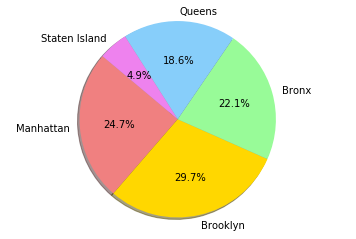

In [40]:
# Want to express the number of stops that occur in each borough as a percentage of all nypd stops; however, this number could tell us more about population
#density than anything else. (this number could be misleading)

borough_pie = ["Manhattan", "Brooklyn", "Bronx", "Queens", "Staten Island"]
boro_sqf_values = [manhattan_stops, brooklyn_stops, bronx_stops, queens_stops, staten_stops]
boro_pie_colors = ["lightcoral", "gold", "palegreen", "lightskyblue", "violet"]

plt.pie(boro_sqf_values, labels=borough_pie, colors=boro_pie_colors, autopct="%1.1f%%",
 shadow=True, startangle=140)
# Create equal axes for nice circle
plt.axis("equal")

In [41]:
# Number of stops relative to population of each borough 
# read in csv file 
Population_2017 = "borough_population.csv"
df_pop = pd.read_csv(Population_2017)
print(df_pop)

  Geographic_Area  Population
0           Bronx     1471160
1        Brooklyn     2648771
2       Manhattan     1664727
3          Queens     2358582
4   Staten Island      479458
5   New York City     8622698


(-1.1159578555692895,
 1.1173872549886033,
 -1.1115167783940745,
 1.1100413255364991)

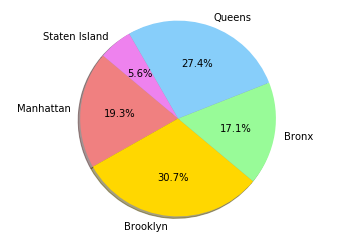

In [42]:
# Want to illustrate how total NYC population is distributed across boroughs.
# Percentage of SQF in each borough should be roughly equal to the boroughs share of overall pop

pop_pie = ["Manhattan", "Brooklyn", "Bronx", "Queens", "Staten Island"]
pop_values = [1664727, 2648771, 1471160, 2358582, 479458]
boro_pie_colors = ["lightcoral", "gold", "palegreen", "lightskyblue", "violet"]

plt.pie(pop_values, labels=pop_pie, colors=boro_pie_colors, autopct="%1.1f%%", shadow=True, startangle=140)
# Create equal axes for nice circle
plt.axis("equal")

In [43]:
# DISREGARD ===============================================================================================================
#loc [row title, column title] -- retrieves value where row and column intersect
#would have been easier to hard code values but wanted to practice 
#df_pop = df_pop.set_index("Geographic_Area")
#bronx_pop = df_pop.loc["Bronx", "Population"]
#brooklyn_pop = df_pop.loc["Brooklyn", "Population"]
#manhattan_pop = df_pop.loc["Manhattan", "Population"]
#queens_pop = df_pop.loc["Queens", "Population"]
#staten_pop = df_pop.loc["Staten Island", "Population"]
#nyc_pop = df_pop.loc["New York City", "Population"]

In [44]:
combined_df = pd.merge(df_pop, stops_df, how="outer", on="Geographic_Area")
combined_df["Stops_by_Population"] = ""
combined_df

,Geographic_Area,Population,SQF_Stops,Stops_by_Population
0,Bronx,1471160,2473,
1,Brooklyn,2648771,3328,
2,Manhattan,1664727,2771,
3,Queens,2358582,2079,
4,Staten Island,479458,546,
5,New York City,8622698,11197,


In [45]:
combined_df.dtypes

Geographic_Area        object
Population              int64
SQF_Stops               int64
Stops_by_Population    object
dtype: object

In [46]:
for index, row in combined_df.iterrows():
    combined_df.loc[index, "Stops_by_Population"] = combined_df.loc[index, "SQF_Stops"]/combined_df.loc[index, "Population"]

In [47]:
combined_df

,Geographic_Area,Population,SQF_Stops,Stops_by_Population
0,Bronx,1471160,2473,0.00168099
1,Brooklyn,2648771,3328,0.00125643
2,Manhattan,1664727,2771,0.00166454
3,Queens,2358582,2079,0.000881462
4,Staten Island,479458,546,0.00113879
5,New York City,8622698,11197,0.00129855


In [66]:
#find day counts overall using value_counts and create a dataframe

total_days_df = pd.DataFrame(df_reduced["DAY2"].value_counts())
#rename column
total_days_df.columns = ["Number_of_Stops"]
total_days_df

,Number_of_Stops
Thursday,1801
Wednesday,1799
Saturday,1797
Tuesday,1721
Friday,1704
Sunday,1490
Monday,1317


In [70]:
manhattan_days = pd.DataFrame(manhattan_df["DAY2"].value_counts())
manhattan_days.columns = ["Number_of_Stops"]

brooklyn_days = pd.DataFrame(brooklyn_df["DAY2"].value_counts())
brooklyn_days.columns = ["Number_of_Stops"]

bronx_days = pd.DataFrame(bronx_df["DAY2"].value_counts())
bronx_days.columns = ["Number_of_Stops"]

queens_days = pd.DataFrame(queens_df["DAY2"].value_counts())
queens_days.columns = ["Number_of_Stops"]

staten_days = pd.DataFrame(staten_df["DAY2"].value_counts())
staten_days.columns = ["Number_of_Stops"]


In [92]:
day_df = pd.concat([manhattan_days, brooklyn_days, bronx_days, queens_days, staten_days], axis=1)

day_df.columns = ["Manhattan_Stops", "Brooklyn_Stops", "Bronx_Stops", "Queens_Stops", "Staten_Island_Stops"]


C:\Users\Rachael C. Amick\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [93]:
day_df

,Manhattan_Stops,Brooklyn_Stops,Bronx_Stops,Queens_Stops,Staten_Island_Stops
Friday,432,495,309,310,99
Monday,318,381,254,241,68
Saturday,373,533,425,320,78
Sunday,378,426,314,249,59
Thursday,411,498,398,343,87
Tuesday,416,491,390,289,70
Wednesday,443,504,383,327,85


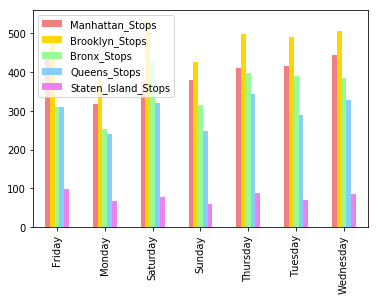

In [94]:
day_df.plot.bar(colors=["lightcoral", "gold", "palegreen", "lightskyblue", "violet"])